<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


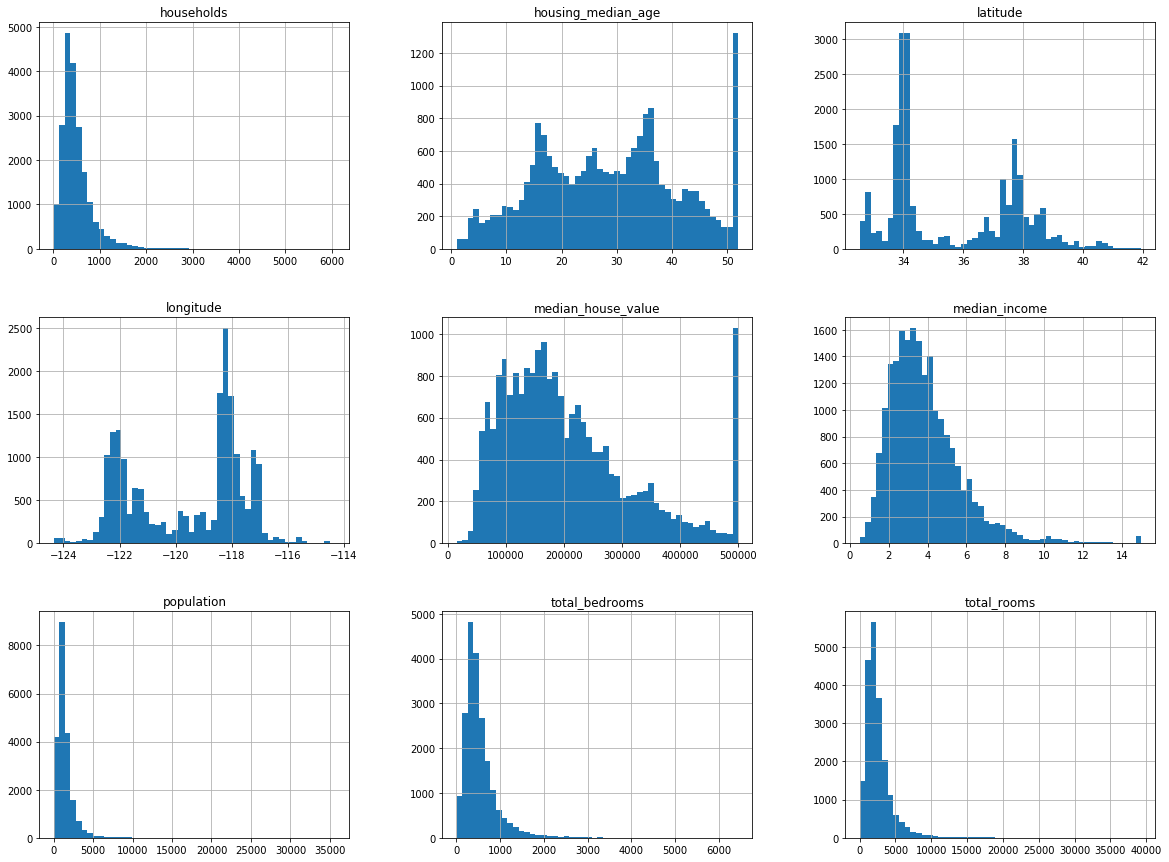

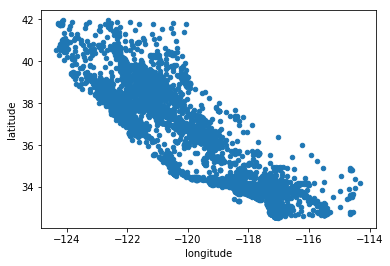

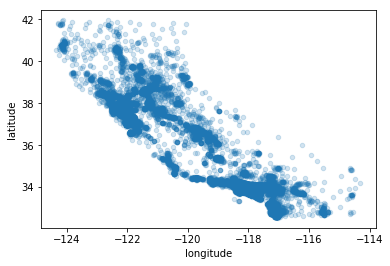

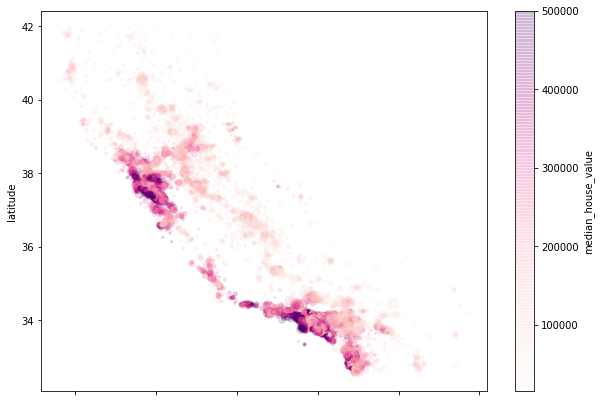

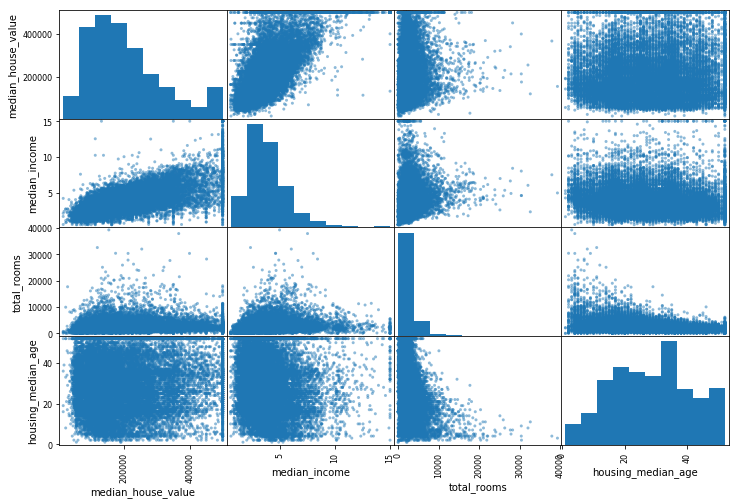

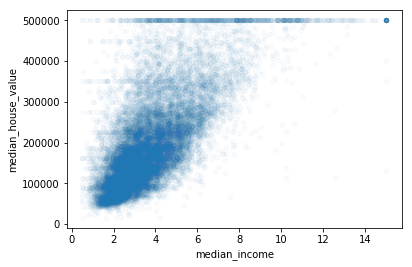

In [3]:
# -*- coding: utf-8 -*-

###############################################################################
# "Housing data (exploring)" example
###############################################################################
#  Objectives:
#   Extending the exploration of the "California housint " dataset with
#       some plots.
#  Source:
#   https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb
#   https://github.com/ageron/handson-ml/tree/master/datasets/housing
#   https://pandas.pydata.org/pandas-docs/stable/reference/api/
#   https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#   https://matplotlib.org/tutorials/colors/colormaps.html
###############################################################################

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Import required libraries
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Setup data path
DATA_PATH = "../data/extracted/housing/"
DATA_FILE = "housing.csv"
FULL_PATH = DATA_PATH + DATA_FILE

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Read the CSV file into a data frame
data = pd.read_csv(FULL_PATH)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Get information about our dataframe
data.head(10)
#info que valores hay en cada columna
data.info()
headers = list(data)
print(headers)

data["ocean_proximity"]
data["ocean_proximity"].value_counts()

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Get some basic statistics and plots
data.describe()
data.hist(bins=50, figsize=(20, 15))
plt.show()
# plt.savefig('./images/scikit04.png',dpi=500)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Create a test set
def splitTrain(data, ratio):
    ixShuffle = np.random.permutation(len(data))
    testSetSize = int(len(data) * ratio)
    ixTest = ixShuffle[:testSetSize]
    ixTrain = ixShuffle[testSetSize:]
    return (data.iloc[ixTrain], data.iloc[ixTest])

(train,test) = splitTrain(data, .05)
test

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Plotting
data.plot(kind="scatter", x="longitude", y="latitude")
data.plot(kind="scatter", x="longitude", y="latitude", alpha=.2)
data.plot(
    kind="scatter", x="longitude", y="latitude",
    alpha=.15, s=data["population"]/100, figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("RdPu"), colorbar=True
)
plt.savefig('./images/california.png',dpi=500)


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Correlation (Pearson)
data.corr()

attr = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attr], figsize=(12,8))
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.025)


